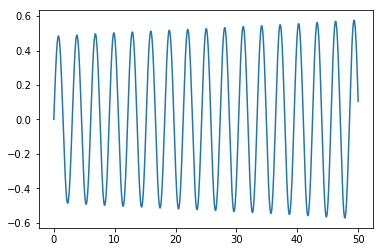

In [2]:
import tensorflow_diff_eq.diff_eq as diff_eq
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

eq = diff_eq.DifferentialEquation()

# Define the quantities involved in the harmonic oscillator
(x, k, m) = eq.generate_quantities(3)

# Define these quantities
eq.define_quantity(k, 3.0, 0, 1)(0.0)
eq.define_quantity(m, 0.7, 0, 1)(0.0)

# The actual equation
eq.define_quantity(x, 1.0, 1, 2)(-k.d(0)*x.d(0)/m.d(0))

# Start tensorflow
sess = tf.Session()
sess.run(tf.global_variables_initializer())
simulate_op = eq.generate_simulate_operation(0.005)


# Simulate and record values
xs = np.zeros(5000)
ts = np.zeros(5000)
for i in range(5000):
    xs[i] = sess.run(x.d(0))
    if i < 4999:
        sess.run(simulate_op)
        sess.run(simulate_op)
        ts[i+1] = ts[i] + 0.01

plt.plot(ts,xs)
plt.show()

# Visualize a tensorflow graph 

In [3]:
# Functions to show the Graphs
import numpy as np
from IPython.display import clear_output, Image, display, HTML

def strip_consts(graph_def, max_const_size=32):
    """Strip large constant values from graph_def."""
    strip_def = tf.GraphDef()
    for n0 in graph_def.node:
        n = strip_def.node.add() 
        n.MergeFrom(n0)
        if n.op == 'Const':
            tensor = n.attr['value'].tensor
            size = len(tensor.tensor_content)
            if size > max_const_size:
                tensor.tensor_content = b"<stripped %d bytes>"%size
    return strip_def

def show_graph(graph_def, max_const_size=32):
    """Visualize TensorFlow graph."""
    if hasattr(graph_def, 'as_graph_def'):
        graph_def = graph_def.as_graph_def()
    strip_def = strip_consts(graph_def, max_const_size=max_const_size)
    code = """
        <script>
          function load() {{
            document.getElementById("{id}").pbtxt = {data};
          }}
        </script>
        <link rel="import" href="https://tensorboard.appspot.com/tf-graph-basic.build.html" onload=load()>
        <div style="height:600px">
          <tf-graph-basic id="{id}"></tf-graph-basic>
        </div>
    """.format(data=repr(str(strip_def)), id='graph'+str(np.random.rand()))

    iframe = """
        <iframe seamless style="width:1200px;height:620px;border:0" srcdoc="{}"></iframe>
    """.format(code.replace('"', '&quot;'))
    display(HTML(iframe))

In [4]:
show_graph(tf.get_default_graph())

In [ ]:
# END